In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization, Activation
from keras import backend as K
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import pandas as pd

In [2]:
classes = os.listdir('../blood cancer/input/train')

In [3]:
enc = OneHotEncoder()
enc.fit([[0], [1], [2], [3]]) 
def names(number):
    if(number == 0):
        return classes[0]
    elif(number == 1):
        return classes[1]
    elif(number == 2):
        return classes[2]
    elif(number == 3):
        return classes[3]
    



In [6]:
trainData = []
trainLabel = []
dim = (150, 150)
trainPath = "../blood cancer/input/train"
index = 0
for dir in os.listdir(trainPath):
    filePaths = []
    subDir = os.path.join(trainPath, dir)
    for file in os.listdir(subDir):
        imgFullPath = os.path.join(subDir, file)
        filePaths.append(imgFullPath)
        img = Image.open(imgFullPath)
        x = img.resize(dim)
        x = np.array(x)
        trainData.append(np.array(x))
        trainLabel.append(enc.transform([[index]]).toarray())
    print(names(index))
    print(str(dir))
    index += 1
    
trainData = np.array(trainData)
trainLabel = np.array(trainLabel).reshape(40, 4)
print(trainData.shape)
print(trainLabel.shape)

leukemia
leukemia
lymphoma
lymphoma
myeloma
myeloma
Normal
Normal
(40, 150, 150, 3)
(40, 4)


In [7]:
testData = []
testLabel = []
dim = (150, 150)
testPath = "../blood cancer/input/test"
index = 0
for dir in os.listdir(testPath):
    filePaths = []
    subDir = os.path.join(testPath, dir)
    for file in os.listdir(subDir):
        imgFullPath = os.path.join(subDir, file)
        filePaths.append(imgFullPath)
        img = Image.open(imgFullPath)
        x = img.resize(dim)
        x = np.array(x)
        testData.append(np.array(x))
        testLabel.append(enc.transform([[index]]).toarray())
    print(names(index))
    print(str(dir))
    index += 1
testData = np.array(testData)
testLabel = np.array(testLabel).reshape(40, 4)
print(testData.shape)
print(testLabel.shape)

leukemia
leukemia
lymphoma
lymphoma
myeloma
myeloma
Normal
Normal
(40, 150, 150, 3)
(40, 4)


In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3))) 
model.add(Activation('relu'))           
model.add(MaxPooling2D(pool_size=(2, 2)))  
model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='adam')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0

In [9]:
history = model.fit(trainData, trainLabel,batch_size = 32, epochs = 19, verbose=1,validation_data=(testData, testLabel))

Epoch 1/19
2/2 [==============================] - 4s 2s/step - loss: 117.1041 - val_loss: 1420.2357
Epoch 2/19
2/2 [==============================] - 2s 1s/step - loss: 1247.5081 - val_loss: 321.0553
Epoch 3/19
2/2 [==============================] - 2s 1s/step - loss: 459.6178 - val_loss: 172.4763
Epoch 4/19
2/2 [==============================] - 2s 1s/step - loss: 187.1966 - val_loss: 44.2780
Epoch 5/19
2/2 [==============================] - 2s 1s/step - loss: 56.2408 - val_loss: 40.0438
Epoch 6/19
2/2 [==============================] - 2s 1s/step - loss: 46.2633 - val_loss: 10.9502
Epoch 7/19
2/2 [==============================] - 2s 1s/step - loss: 10.5827 - val_loss: 2.3521
Epoch 8/19
2/2 [==============================] - 2s 1s/step - loss: 3.8314 - val_loss: 2.9308
Epoch 9/19
2/2 [==============================] - 2s 1s/step - loss: 2.5668 - val_loss: 0.9539
Epoch 10/19
2/2 [==============================] - 2s 1s/step - loss: 1.7345 - val_loss: 0.4147
Epoch 11/19
2/2 [==========

In [10]:
model.save("bloodcancer.h5")

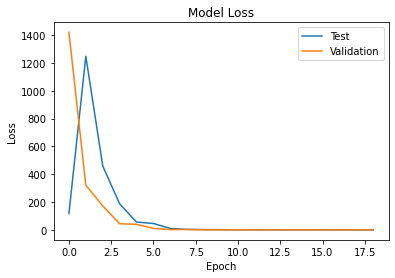

In [11]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

100.0% Confidence This Is Normal


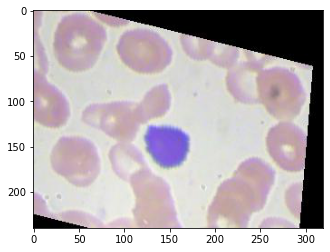

In [15]:
img = Image.open('../blood cancer/input/test/Normal/_0_1248.jpeg')
x = np.array(img.resize(dim))
x = x.reshape(1,150,150,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is ' + names(classification))